In [2]:
import sys
sys.path.append('../')
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utility.file_utility import FileUtility
from utility.visualization_utility import plot_scatter
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline 

Populating the interactive namespace from numpy and matplotlib


In [125]:
def plot_pca_tsne_nn(X_pca, X_tsne, X_tsne_NN, Y, filename=False,  legend_size=7, label_dic=False, color_idx=2, loc=[(4,1),(4,1),(4,1)]):
    myplot=figure(figsize=(24, 8))
    ax=subplot(131)
    plot_scatter(ax, X_pca, Y, 'PCA_1', 'PCA_0', '(i) PCA over 6-mer representations', loc[0][0], legend_col=loc[0][1], legend_size=legend_size, label_dict=label_dic, color_schemes_idx=color_idx)
    ax=subplot(132)
    plot_scatter(ax, X_tsne, Y, 't-SNE_1', 't-SNE_0', '(ii) t-SNE over 6-mer representations', loc[1][0], legend_col=loc[1][1],  legend_size=legend_size,label_dict=label_dic, color_schemes_idx=color_idx)
    ax=subplot(133)
    plot_scatter(ax, X_tsne_NN, Y, 't-SNE_1', 't-SNE_0', '(iii) t-SNE / activation function of the last layer of neural network', loc[2][0], legend_col=loc[2][1],  legend_size=legend_size, label_dict=label_dic, color_schemes_idx=color_idx)
    myplot.tight_layout()
    if filename:
        plt.savefig(filename+'.pdf')
    else:
        plt.show()

In [4]:
def get_pca_tsne(X, X_NN):    
    X_pca = PCA(n_components=50).fit_transform(X.toarray())
    X_tsne = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X.toarray())
    X_tsne_NN = TSNE(n_components=2, perplexity=40, verbose=2, learning_rate=10).fit_transform(X_NN)
    return X_pca, X_tsne, X_tsne_NN

In [113]:
def create_tsne_web(X, Y, tsne_file_coor, tsne_file_label):
    classes=list(set(Y))
    classes.sort()
    L=[classes.index(y) for y in Y]
    tsne_res = np.hstack((X, np.array([L]).T))
    tsne_res[:,0:2]=np.round(tsne_res[:,0:2],2)
    tsne_lines=[]
    for l in tsne_res:
        tsne_lines.append('\t'.join([str(l[0]), str(l[1]), str(int(l[2]))]))
    FileUtility.save_list(tsne_file_coor,tsne_lines)
    FileUtility.save_list(tsne_file_label,Y)

# Body-site

In [4]:
X=FileUtility.load_sparse_csr('../../datasets/processed_data/body-site/K/6-mers_rate_2000.npz')
X_NN=np.loadtxt('../../datasets/processed_data/body-site/visualization/Activation_3layers')
Y=FileUtility.load_list('../../datasets/processed_data/body-site/data_config/labels_phen.txt')
label_dict={'saliva':'saliva (oral)','vagina':'mid vagina (urogenital)','nose':'anterior nares (nasal)','stool':'stool (gut)','posterior':'posterior fornix (urogenital)'}

In [5]:
X_pca_bs, X_tsne_bs, X_tsne_NN_bs=get_pca_tsne(X, X_NN)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1192 samples in 0.096s...
[t-SNE] Computed neighbors for 1192 samples in 8.516s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1192
[t-SNE] Computed conditional probabilities for sample 1192 / 1192
[t-SNE] Mean sigma: 0.005435
[t-SNE] Computed conditional probabilities in 0.096s
[t-SNE] Iteration 50: error = 68.4876862, gradient norm = 0.0068887 (50 iterations in 0.855s)
[t-SNE] Iteration 100: error = 52.1957817, gradient norm = 0.0071015 (50 iterations in 0.987s)
[t-SNE] Iteration 150: error = 50.4098587, gradient norm = 0.0028498 (50 iterations in 0.809s)
[t-SNE] Iteration 200: error = 49.8661423, gradient norm = 0.0018148 (50 iterations in 0.815s)
[t-SNE] Iteration 250: error = 49.6036148, gradient norm = 0.0013866 (50 iterations in 0.798s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.603615
[t-SNE] Iteration 300: error = 1.0518130, gradient norm = 0.0048042 (50 iterations in 0.807s

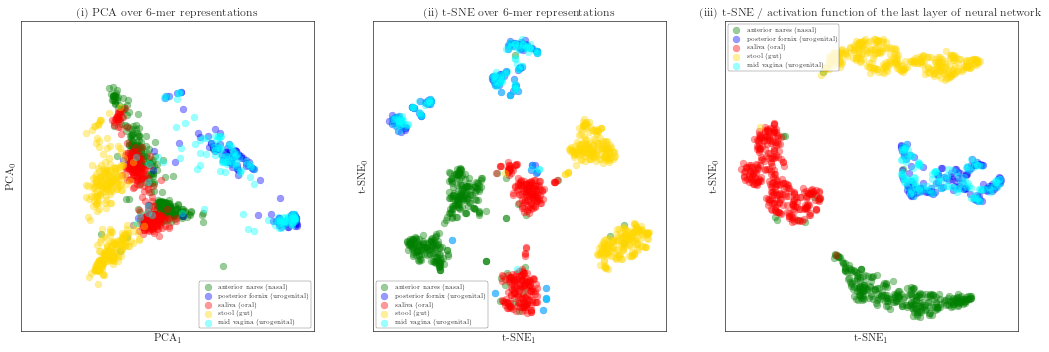

In [7]:
plot_pca_tsne_nn(X_pca_bs, X_tsne_bs, X_tsne_NN_bs, Y, filename=False, legend_size=6, label_dic=label_dict, color_idx=0, loc=[4,3,2])

# Ecological Environment

In [251]:
global color_schemes
color_schemes=[['green','blue','red','gold', 'cyan'], ['#ff0505', '#f2a041', '#cdff05', '#04d9cb', '#45a8ff', '#8503a6', '#590202', '#734d02', '#4ab304', '#025359', '#0454cc', '#ff45da', '#993829', '#ffda45', '#1c661c', '#05cdff', '#1c2f66', '#731f57', '#b24a04', '#778003', '#0e3322', '#024566', '#0404d9', '#e5057d', '#66391c', '#31330e', '#3ee697', '#2d7da6', '#20024d', '#33011c']+list(({'aliceblue':            '#F0F8FF','antiquewhite':         '#FAEBD7','aqua':                 '#00FFFF','aquamarine':           '#7FFFD4','azure':                '#F0FFFF','beige':                '#F5F5DC','bisque':               '#FFE4C4','black':                '#000000','blanchedalmond':       '#FFEBCD','blue':                 '#0000FF','blueviolet':           '#8A2BE2','brown':                '#A52A2A','burlywood':            '#DEB887','cadetblue':            '#5F9EA0','chartreuse':           '#7FFF00','chocolate':            '#D2691E','coral':                '#FF7F50','cornflowerblue':       '#6495ED','cornsilk':             '#FFF8DC','crimson':              '#DC143C','cyan':                 '#00FFFF','darkblue':             '#00008B','darkcyan':             '#008B8B','darkgoldenrod':        '#B8860B','darkgray':             '#A9A9A9','darkgreen':            '#006400','darkkhaki':            '#BDB76B','darkmagenta':          '#8B008B','darkolivegreen':       '#556B2F','darkorange':           '#FF8C00','darkorchid':           '#9932CC','darkred':              '#8B0000','darksalmon':           '#E9967A','darkseagreen':         '#8FBC8F','darkslateblue':        '#483D8B','darkslategray':        '#2F4F4F','darkturquoise':        '#00CED1','darkviolet':           '#9400D3','deeppink':             '#FF1493','deepskyblue':          '#00BFFF','dimgray':              '#696969','dodgerblue':           '#1E90FF','firebrick':            '#B22222','floralwhite':          '#FFFAF0','forestgreen':          '#228B22','fuchsia':              '#FF00FF','gainsboro':            '#DCDCDC','ghostwhite':           '#F8F8FF','gold':                 '#FFD700','goldenrod':            '#DAA520','gray':                 '#808080','green':                '#008000','greenyellow':          '#ADFF2F','honeydew':             '#F0FFF0','hotpink':              '#FF69B4','indianred':            '#CD5C5C','indigo':               '#4B0082','ivory':                '#FFFFF0','khaki':                '#F0E68C','lavender':             '#E6E6FA','lavenderblush':        '#FFF0F5','lawngreen':            '#7CFC00','lemonchiffon':         '#FFFACD','lightblue':            '#ADD8E6','lightcoral':           '#F08080','lightcyan':            '#E0FFFF','lightgoldenrodyellow': '#FAFAD2','lightgreen':           '#90EE90','lightgray':            '#D3D3D3','lightpink':            '#FFB6C1','lightsalmon':          '#FFA07A','lightseagreen':        '#20B2AA','lightskyblue':         '#87CEFA','lightslategray':       '#778899','lightsteelblue':       '#B0C4DE','lightyellow':          '#FFFFE0','lime':                 '#00FF00','limegreen':            '#32CD32','linen':                '#FAF0E6','magenta':              '#FF00FF','maroon':               '#800000','mediumaquamarine':     '#66CDAA','mediumblue':           '#0000CD','mediumorchid':         '#BA55D3','mediumpurple':         '#9370DB','mediumseagreen':       '#3CB371','mediumslateblue':      '#7B68EE','mediumspringgreen':    '#00FA9A','mediumturquoise':      '#48D1CC','mediumvioletred':      '#C71585','midnightblue':         '#191970','mintcream':            '#F5FFFA','mistyrose':            '#FFE4E1','moccasin':             '#FFE4B5','navajowhite':          '#FFDEAD','navy':                 '#000080','oldlace':              '#FDF5E6','olive':                '#808000','olivedrab':            '#6B8E23','orange':               '#FFA500','orangered':            '#FF4500','orchid':               '#DA70D6','palegoldenrod':        '#EEE8AA','palegreen':            '#98FB98','paleturquoise':        '#AFEEEE','palevioletred':        '#DB7093','papayawhip':           '#FFEFD5','peachpuff':            '#FFDAB9','peru':                 '#CD853F','pink':                 '#FFC0CB','plum':                 '#DDA0DD','powderblue':           '#B0E0E6','purple':               '#800080','red':                  '#FF0000','rosybrown':            '#BC8F8F','royalblue':            '#4169E1','saddlebrown':          '#8B4513','salmon':               '#FA8072','sandybrown':           '#FAA460','seagreen':             '#2E8B57','seashell':             '#FFF5EE','sienna':               '#A0522D','silver':               '#C0C0C0','skyblue':              '#87CEEB','slateblue':            '#6A5ACD','slategray':            '#708090','snow':                 '#FFFAFA','springgreen':          '#00FF7F','steelblue':            '#4682B4','tan':                  '#D2B48C','teal':                 '#008080','thistle':              '#D8BFD8','tomato':               '#FF6347','turquoise':            '#40E0D0','violet':               '#EE82EE','wheat':                '#F5DEB3','white':                '#FFFFFF','whitesmoke':           '#F5F5F5','yellow':               '#FFFF00','yellowgreen':          '#9ACD32'}).keys()),['#ff0505', '#f2a041', '#cdff05', '#04d9cb', '#45a8ff', '#8503a6', '#590202', '#734d02', '#4ab304', '#025359', '#0454cc', '#ff45da', '#993829', '#ffda45', '#1c661c', '#05cdff', '#1c2f66', '#731f57', '#b24a04', '#778003', '#0e3322', '#024566', '#0404d9', '#e5057d', '#66391c', '#31330e', '#3ee697', '#2d7da6', '#20024d', '#33011c']]

In [250]:
def plot_scatter(ax, X, Y, x_label, y_label, title,legend_hide=True, legend_loc=4, label_dict=False, legend_size=7, legend_col=1, color_schemes_idx=1):
    
    global color_schemes
    
    target=list(set(Y))
    target.sort()
    color_idx=[target.index(x) for x in Y]
    color_list=color_schemes[color_schemes_idx]
  
    for current_color in range(len(target)):
        color=color_list
        current_idxs=[idx for idx,v in enumerate(color_idx) if v==current_color]
        if label_dict:
            ax.scatter(X[current_idxs, 0], X[current_idxs, 1], c=color[current_color], label=label_dict[target[current_color]], cmap='viridis', alpha=0.4, edgecolors=None)
        else:
            ax.scatter(X[current_idxs, 0], X[current_idxs, 1], c=color[current_color], label=target[current_color], cmap='viridis', alpha=0.4, edgecolors=None)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks([])
    plt.yticks([])
    ax.set_title(title)
    if not legend_hide:
        ax.legend(loc=legend_loc, bbox_to_anchor=(0.5, -0.1), prop={'size': legend_size},ncol=legend_col, edgecolor='black', facecolor='white', frameon=True)
    matplotlib.rcParams['mathtext.fontset'] = 'stix'
    matplotlib.rcParams['font.family'] = 'STIXGeneral'
    matplotlib.rcParams['mathtext.fontset'] = 'custom'
    matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
    matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
    matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
    matplotlib.rcParams["axes.edgecolor"] = "black"
    matplotlib.rcParams["axes.linewidth"] = 0.6
    plt.rc('text', usetex=True)
    rect = ax.patch
    rect.set_facecolor('white')



In [288]:
from classifier.DNN import DNNMutliclass16S

X=FileUtility.load_sparse_csr('../../datasets/processed_data/eco_10000/K/6-mer_eco_restrictedmer.npz')
#X_NN=np.loadtxt('../../datasets/results/eco_10000/classifiers/')
X_NN=DNNMutliclass16S.make_activation_function('../../datasets/results/eco_10000/classifiers/nn_layers_mlp_1024-0.2-1024-0.2-512-0.2-512-0.1-64-1024_0.86.pickle', X.toarray())

In [289]:
Y=FileUtility.load_list('../../datasets/processed_data/eco_10000/K/eco_label_restrictedkmer.txt')
label_dict=None

In [290]:
X_NN.shape

(180000, 1024)

In [291]:
#rand_idx=np.random.choice(180000, 3600, replace=False)
#FileUtility.save_list('../../datasets/processed_data/eco/visualization/rand_idx_10000.txt',[str(x) for x in list(rand_idx)])
rand_idx=[int(x) for x in FileUtility.load_list('../../datasets/processed_data/eco/visualization/rand_idx_10000.txt')]

In [292]:
len(rand_idx)

3600

In [293]:
Y=[Y[idx] for idx in list(rand_idx)]
X=X[rand_idx,:]
X_NN=X_NN[rand_idx,:]

In [294]:
X_pca_ec, X_tsne_ec, X_tsne_NN_ec=get_pca_tsne(X, X_NN)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3600 samples in 0.718s...
[t-SNE] Computed neighbors for 3600 samples in 74.337s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3600
[t-SNE] Computed conditional probabilities for sample 2000 / 3600
[t-SNE] Computed conditional probabilities for sample 3000 / 3600
[t-SNE] Computed conditional probabilities for sample 3600 / 3600
[t-SNE] Mean sigma: 0.015322
[t-SNE] Computed conditional probabilities in 0.279s
[t-SNE] Iteration 50: error = 78.8815460, gradient norm = 0.0000678 (50 iterations in 3.756s)
[t-SNE] Iteration 100: error = 77.4170837, gradient norm = 0.0127420 (50 iterations in 3.708s)
[t-SNE] Iteration 150: error = 68.7619781, gradient norm = 0.0015391 (50 iterations in 3.659s)
[t-SNE] Iteration 200: error = 68.0302277, gradient norm = 0.0004570 (50 iterations in 3.678s)
[t-SNE] Iteration 250: error = 67.9477081, gradient norm = 0.0001291 (50 iterations in 3.704s)
[t-SNE] KL divergence after 250 itera

In [295]:
def plot_pca_tsne_nn(X_pca, X_tsne, X_tsne_NN, Y, filename=False,  legend_size=7, label_dic=False, color_idx=2, loc=[(4,1),(4,1),(4,1)]):
    myplot=figure(figsize=(12, 12))
    ax=subplot(221)
    plot_scatter(ax, X_pca, Y, 'PCA_1', 'PCA_0', '(i) PCA over 6-mer representations',legend_hide=True, legend_loc=loc[0][0], legend_col=loc[0][1], legend_size=legend_size, label_dict=label_dic, color_schemes_idx=color_idx)
    ax=subplot(222)
    plot_scatter(ax, X_tsne, Y, 't-SNE_1', 't-SNE_0', '(ii) t-SNE over 6-mer representations',legend_hide=False,  legend_loc=9, legend_col=loc[1][1],  legend_size=legend_size,label_dict=label_dic, color_schemes_idx=color_idx)
    ax=subplot(223)
    plot_scatter(ax, X_tsne_NN, Y, 't-SNE_1', 't-SNE_0', '(iii) t-SNE / activation function of the last layer of neural network',legend_hide=True,  legend_loc=loc[2][0], legend_col=loc[2][1],  legend_size=legend_size, label_dict=label_dic, color_schemes_idx=color_idx)
    myplot.tight_layout()
    if filename:
        plt.savefig(filename+'.pdf')
    else:
        plt.show()

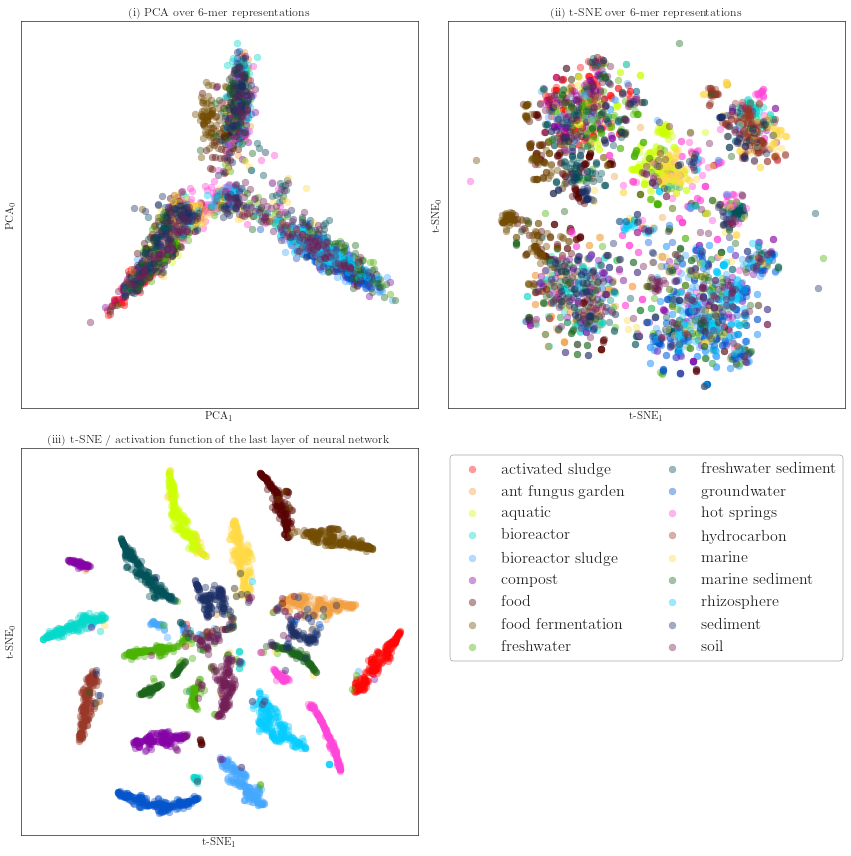

In [296]:
plot_pca_tsne_nn(X_pca_ec, X_tsne_ec, X_tsne_NN_ec, [x.replace('_',' ') for x in Y], filename='../../datasets/figures/paper_figures/temp.pdf', legend_size=16, label_dic=False, color_idx=2, loc=[(1,2),(1,2),(1,2)])

In [143]:
X=FileUtility.load_sparse_csr('../../datasets/processed_data/eco_all_classes/6-mer_eco_restrictedmer_all.npz')
X_NN=np.loadtxt('../../datasets/results/eco_all/activation_from_pretrained_0.88.txt')
Y=FileUtility.load_list('../../datasets/processed_data/eco_all_classes/eco_label_restrictedkmer_all.txt')
label_dict=None

In [144]:
rand_idx=np.random.choice(X.shape[0], 3600, replace=False)


In [145]:
FileUtility.save_list('../../datasets/processed_data/eco_all_classes/rand_idx.txt',[str(x) for x in list(rand_idx)])
Y=[Y[idx] for idx in list(rand_idx)]
X=X[rand_idx,:]
X_NN=X_NN[rand_idx,:]

In [146]:
X_pca_ec, X_tsne_ec, X_tsne_NN_ec=get_pca_tsne(X, X_NN)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3600 samples in 0.729s...
[t-SNE] Computed neighbors for 3600 samples in 74.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3600
[t-SNE] Computed conditional probabilities for sample 2000 / 3600
[t-SNE] Computed conditional probabilities for sample 3000 / 3600
[t-SNE] Computed conditional probabilities for sample 3600 / 3600
[t-SNE] Mean sigma: 0.015452
[t-SNE] Computed conditional probabilities in 0.297s
[t-SNE] Iteration 50: error = 79.1179352, gradient norm = 0.0000738 (50 iterations in 3.639s)
[t-SNE] Iteration 100: error = 78.9146042, gradient norm = 0.0045446 (50 iterations in 3.479s)
[t-SNE] Iteration 150: error = 72.4213486, gradient norm = 0.0013967 (50 iterations in 3.343s)
[t-SNE] Iteration 200: error = 71.8802338, gradient norm = 0.0003617 (50 iterations in 3.443s)
[t-SNE] Iteration 250: error = 71.8586349, gradient norm = 0.0001199 (50 iterations in 3.457s)
[t-SNE] KL divergence after 250 itera

In [151]:
global color_schemes
color_schemes=[['green','blue','red','gold', 'cyan'], ['#ff0505', '#f2a041', '#cdff05', '#04d9cb', '#45a8ff', '#8503a6', '#590202', '#734d02', '#4ab304', '#025359', '#0454cc', '#ff45da', '#993829', '#ffda45', '#1c661c', '#05cdff', '#1c2f66', '#731f57', '#b24a04', '#778003', '#0e3322', '#024566', '#0404d9', '#e5057d', '#66391c', '#31330e', '#3ee697', '#2d7da6', '#20024d', '#33011c']+list(({'aliceblue':            '#F0F8FF','antiquewhite':         '#FAEBD7','aqua':                 '#00FFFF','aquamarine':           '#7FFFD4','azure':                '#F0FFFF','beige':                '#F5F5DC','bisque':               '#FFE4C4','black':                '#000000','blanchedalmond':       '#FFEBCD','blue':                 '#0000FF','blueviolet':           '#8A2BE2','brown':                '#A52A2A','burlywood':            '#DEB887','cadetblue':            '#5F9EA0','chartreuse':           '#7FFF00','chocolate':            '#D2691E','coral':                '#FF7F50','cornflowerblue':       '#6495ED','cornsilk':             '#FFF8DC','crimson':              '#DC143C','cyan':                 '#00FFFF','darkblue':             '#00008B','darkcyan':             '#008B8B','darkgoldenrod':        '#B8860B','darkgray':             '#A9A9A9','darkgreen':            '#006400','darkkhaki':            '#BDB76B','darkmagenta':          '#8B008B','darkolivegreen':       '#556B2F','darkorange':           '#FF8C00','darkorchid':           '#9932CC','darkred':              '#8B0000','darksalmon':           '#E9967A','darkseagreen':         '#8FBC8F','darkslateblue':        '#483D8B','darkslategray':        '#2F4F4F','darkturquoise':        '#00CED1','darkviolet':           '#9400D3','deeppink':             '#FF1493','deepskyblue':          '#00BFFF','dimgray':              '#696969','dodgerblue':           '#1E90FF','firebrick':            '#B22222','floralwhite':          '#FFFAF0','forestgreen':          '#228B22','fuchsia':              '#FF00FF','gainsboro':            '#DCDCDC','ghostwhite':           '#F8F8FF','gold':                 '#FFD700','goldenrod':            '#DAA520','gray':                 '#808080','green':                '#008000','greenyellow':          '#ADFF2F','honeydew':             '#F0FFF0','hotpink':              '#FF69B4','indianred':            '#CD5C5C','indigo':               '#4B0082','ivory':                '#FFFFF0','khaki':                '#F0E68C','lavender':             '#E6E6FA','lavenderblush':        '#FFF0F5','lawngreen':            '#7CFC00','lemonchiffon':         '#FFFACD','lightblue':            '#ADD8E6','lightcoral':           '#F08080','lightcyan':            '#E0FFFF','lightgoldenrodyellow': '#FAFAD2','lightgreen':           '#90EE90','lightgray':            '#D3D3D3','lightpink':            '#FFB6C1','lightsalmon':          '#FFA07A','lightseagreen':        '#20B2AA','lightskyblue':         '#87CEFA','lightslategray':       '#778899','lightsteelblue':       '#B0C4DE','lightyellow':          '#FFFFE0','lime':                 '#00FF00','limegreen':            '#32CD32','linen':                '#FAF0E6','magenta':              '#FF00FF','maroon':               '#800000','mediumaquamarine':     '#66CDAA','mediumblue':           '#0000CD','mediumorchid':         '#BA55D3','mediumpurple':         '#9370DB','mediumseagreen':       '#3CB371','mediumslateblue':      '#7B68EE','mediumspringgreen':    '#00FA9A','mediumturquoise':      '#48D1CC','mediumvioletred':      '#C71585','midnightblue':         '#191970','mintcream':            '#F5FFFA','mistyrose':            '#FFE4E1','moccasin':             '#FFE4B5','navajowhite':          '#FFDEAD','navy':                 '#000080','oldlace':              '#FDF5E6','olive':                '#808000','olivedrab':            '#6B8E23','orange':               '#FFA500','orangered':            '#FF4500','orchid':               '#DA70D6','palegoldenrod':        '#EEE8AA','palegreen':            '#98FB98','paleturquoise':        '#AFEEEE','palevioletred':        '#DB7093','papayawhip':           '#FFEFD5','peachpuff':            '#FFDAB9','peru':                 '#CD853F','pink':                 '#FFC0CB','plum':                 '#DDA0DD','powderblue':           '#B0E0E6','purple':               '#800080','red':                  '#FF0000','rosybrown':            '#BC8F8F','royalblue':            '#4169E1','saddlebrown':          '#8B4513','salmon':               '#FA8072','sandybrown':           '#FAA460','seagreen':             '#2E8B57','seashell':             '#FFF5EE','sienna':               '#A0522D','silver':               '#C0C0C0','skyblue':              '#87CEEB','slateblue':            '#6A5ACD','slategray':            '#708090','snow':                 '#FFFAFA','springgreen':          '#00FF7F','steelblue':            '#4682B4','tan':                  '#D2B48C','teal':                 '#008080','thistle':              '#D8BFD8','tomato':               '#FF6347','turquoise':            '#40E0D0','violet':               '#EE82EE','wheat':                '#F5DEB3','white':                '#FFFFFF','whitesmoke':           '#F5F5F5','yellow':               '#FFFF00','yellowgreen':          '#9ACD32'}).keys()),['#ff0505', '#f2a041', '#cdff05', '#04d9cb', '#45a8ff', '#8503a6', '#590202', '#734d02', '#4ab304', '#025359', '#0454cc', '#ff45da', '#993829', '#ffda45', '#1c661c', '#05cdff', '#1c2f66', '#731f57', '#b24a04', '#778003', '#0e3322', '#024566', '#0404d9', '#e5057d', '#66391c', '#31330e', '#3ee697', '#2d7da6', '#20024d', '#33011c']]

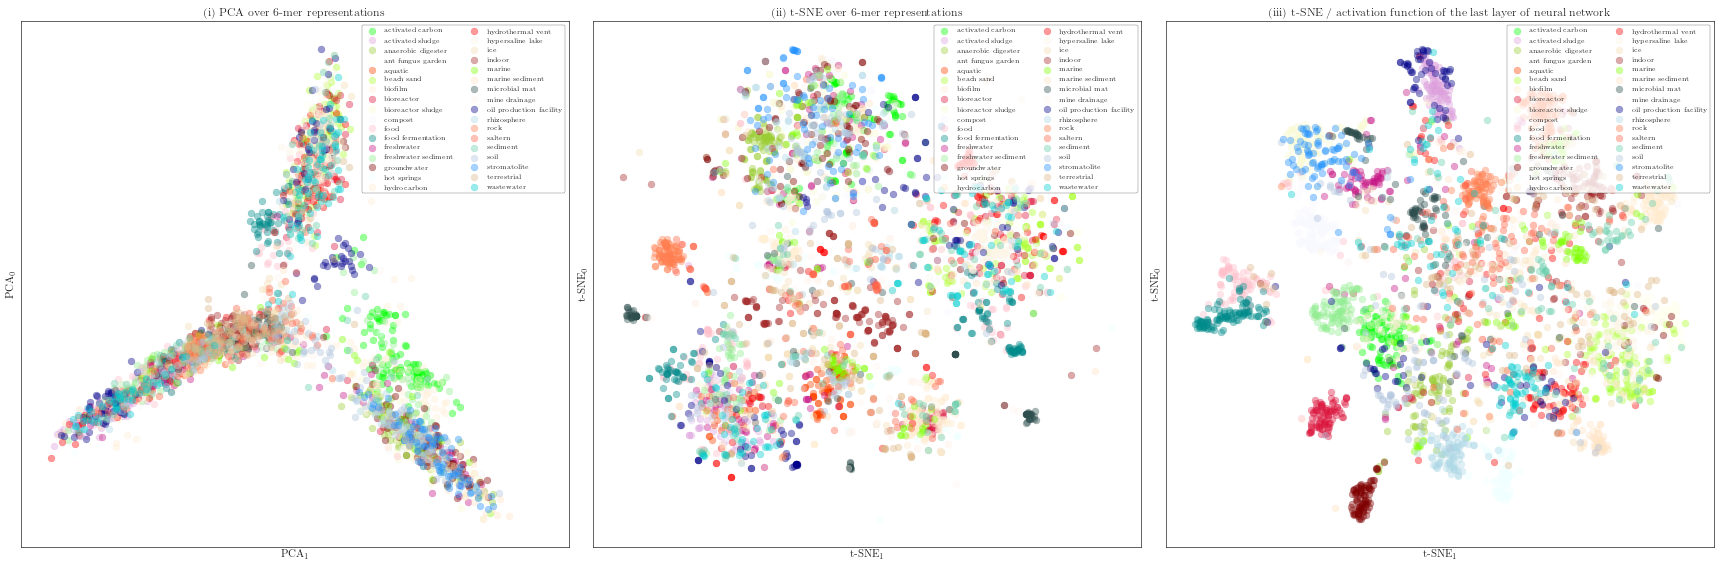

In [152]:
plot_pca_tsne_nn(X_pca_ec, X_tsne_ec, X_tsne_NN_ec, [x.replace('_',' ') for x in Y], filename='../../datasets/figures/paper_figures/eco_visualization_full.pdf', legend_size=7, label_dic=False, color_idx=1, loc=[(1,2),(1,2),(1,2)])

In [150]:
create_tsne_web(X_tsne_NN_ec, Y, 'tsne_file', 'tnse_label')

# Organismal

In [130]:
X=FileUtility.load_sparse_csr('../../datasets/processed_data/org/K/6-mer_org_restrictedkmer.npz')
X_NN=np.loadtxt('../../datasets/processed_data/org/visualization/Activation_6layers_org')
Y=FileUtility.load_list('../../datasets/processed_data/org/K/org_label_restrictedkmer.txt')
label_dict=None

In [131]:
X_pca_ec, X_tsne_ec, X_tsne_NN_ec=get_pca_tsne(X, X_NN)



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3100 samples in 0.770s...
[t-SNE] Computed neighbors for 3100 samples in 60.977s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3100
[t-SNE] Computed conditional probabilities for sample 2000 / 3100
[t-SNE] Computed conditional probabilities for sample 3000 / 3100
[t-SNE] Computed conditional probabilities for sample 3100 / 3100
[t-SNE] Mean sigma: 0.018659
[t-SNE] Computed conditional probabilities in 0.563s
[t-SNE] Iteration 50: error = 77.8525314, gradient norm = 0.0000719 (50 iterations in 2.996s)
[t-SNE] Iteration 100: error = 76.7240067, gradient norm = 0.0113532 (50 iterations in 2.807s)
[t-SNE] Iteration 150: error = 71.2182922, gradient norm = 0.0003706 (50 iterations in 2.608s)
[t-SNE] Iteration 200: error = 71.0172958, gradient norm = 0.0002216 (50 iterations in 2.581s)
[t-SNE] Iteration 250: error = 70.9648743, gradient norm = 0.0001116 (50 iterations in 2.680s)
[t-SNE] KL divergence after 250 itera

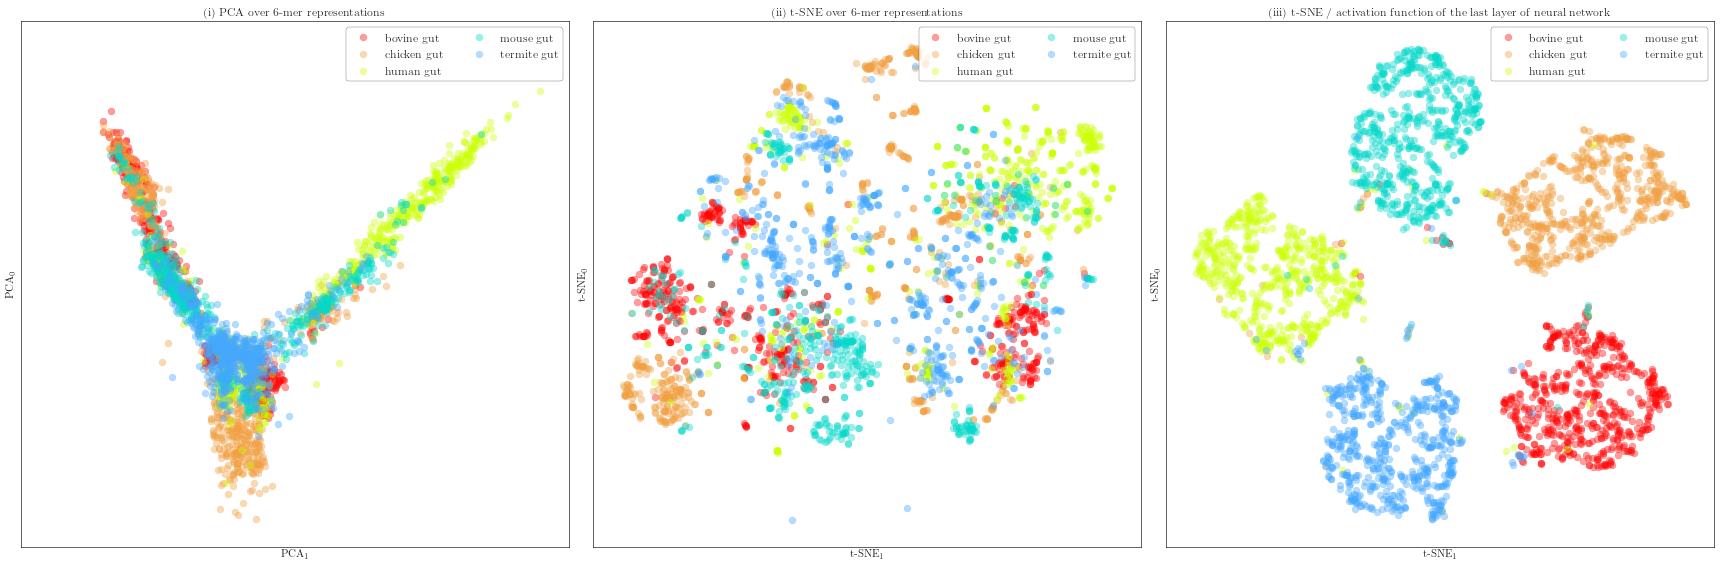

In [136]:
plot_pca_tsne_nn(X_pca_ec, X_tsne_ec, X_tsne_NN_ec, [x.replace('_',' ') for x in Y], filename='../../datasets/figures/paper_figures/org_visualization.pdf', legend_size=12, label_dic=False, color_idx=2, loc=[(1,2),(1,2),(1,2)])